# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD15"
COLLABORATORS = "Grzegorz Cichy 405708        Klaudia Buksa 405794"

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku dane.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [4]:
# YOUR CODE HERE
eruptions_data = pd.read_csv('eruptions_data.csv')
eruptions_data = eruptions_data.set_index('Eruption Number')
eruptions_data




,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

All eruptions#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny: </br>
- Nagłówki 1 poziomu:
    - Eruption category - All, Confirmed Eruption, Uncertain Eruption
- Nagłówki 2 poziomu (dla każdego z nagłówków 1 poziomu ten sam zestaw kolumn):
    - f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
    - cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
    - rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
    - crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [5]:
# YOUR CODE HERE

columns=['f','cf','rf','crf']
vei_data_1 = pd.DataFrame(columns = columns)
vei_data_1['VEI'] = eruptions_data['VEI'].unique()
vei_data_1 = vei_data_1.set_index('VEI')

#vei_data_1 = vei_data_1.sort_index()
#count = eruptions_data['VEI'].value_counts()
#sortek = count.sort_index()
#vei_data_1['f'] = sortek.values
#vei_data_1

f = [ len(eruptions_data[eruptions_data['VEI']==i]) for i in eruptions_data['VEI'].unique() ]
cf = [ len(eruptions_data[eruptions_data['VEI']<=i]) for i in eruptions_data['VEI'].unique() ]
size = len(eruptions_data)
rf = [ len(eruptions_data[eruptions_data['VEI']==i])/size for i in eruptions_data['VEI'].unique()]
crf = [ len(eruptions_data[eruptions_data['VEI']<=i])/size for i in eruptions_data['VEI'].unique()]

vei_data_1['f']=f
vei_data_1['cf']=cf
vei_data_1['rf']=rf
vei_data_1['crf']=crf
vei_data_1 = vei_data_1.sort_index()
vei_data_1

confirmed = eruptions_data[eruptions_data['Eruption Category']=='Confirmed']

columns=['f','cf','rf','crf']
vei_data_2 = pd.DataFrame(columns = columns)
vei_data_2['VEI'] = confirmed['VEI'].unique()
vei_data_2 = vei_data_2.set_index('VEI')

f = [ len(confirmed[confirmed['VEI']==i]) for i in confirmed['VEI'].unique() ]
cf = [ len(confirmed[confirmed['VEI']<=i]) for i in confirmed['VEI'].unique() ]
size = len(confirmed)
rf = [ len(confirmed[confirmed['VEI']==i])/size for i in confirmed['VEI'].unique()]
crf = [ len(confirmed[confirmed['VEI']<=i])/size for i in confirmed['VEI'].unique()]

vei_data_2['f']=f
vei_data_2['cf']=cf
vei_data_2['rf']=rf
vei_data_2['crf']=crf
vei_data_2 = vei_data_2.sort_index()

uncertain = eruptions_data[eruptions_data['Eruption Category']=='Uncertain']

columns=['f','cf','rf','crf']
vei_data_3 = pd.DataFrame(columns = columns)
vei_data_3['VEI'] = uncertain['VEI'].unique()
vei_data_3 = vei_data_3.set_index('VEI')

f = [ len(uncertain[uncertain['VEI']==i]) for i in uncertain['VEI'].unique() ]
cf = [ len(uncertain[uncertain['VEI']<=i]) for i in uncertain['VEI'].unique() ]
size = len(uncertain)
rf = [ len(uncertain[uncertain['VEI']==i])/size for i in uncertain['VEI'].unique()]
crf = [ len(uncertain[uncertain['VEI']<=i])/size for i in uncertain['VEI'].unique()]

vei_data_3['f']=f
vei_data_3['cf']=cf
vei_data_3['rf']=rf
vei_data_3['crf']=crf
vei_data_3 = vei_data_3.sort_index()
vei_data = {}
vei_data['All eruptions'] = vei_data_1
vei_data['Confirmed Eruptions'] = vei_data_2
vei_data['Uncertain Eruptions'] = vei_data_3
vei_data = pd.concat(vei_data, axis = 1)
#pd.options.display.float_format = '{:.4f}'.format
lst = [i for i in vei_data.columns if i[1] in ('rf', 'crf')]
form_d1 = {i : '{:.4f}' for i in lst}
form_d2 = {i : '{:.0f}' for i in vei_data.columns if (i[1] in ('f', 'cf')) & (i[0] in ('Uncertain Eruptions'))}
form_d = {**form_d1, **form_d2}
#vei_data.to_csv('vei_data.csv')
dfi.export(vei_data.style.format_index({"VEI" : "{:.0f}"}).format(form_d), 'vei_data.png')
vei_data.style.format_index({"VEI" : "{:.0f}"}).format(form_d)


In [6]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

Text(0, 0.5, 'CZĘSTOŚĆ SKUMULOWANA')

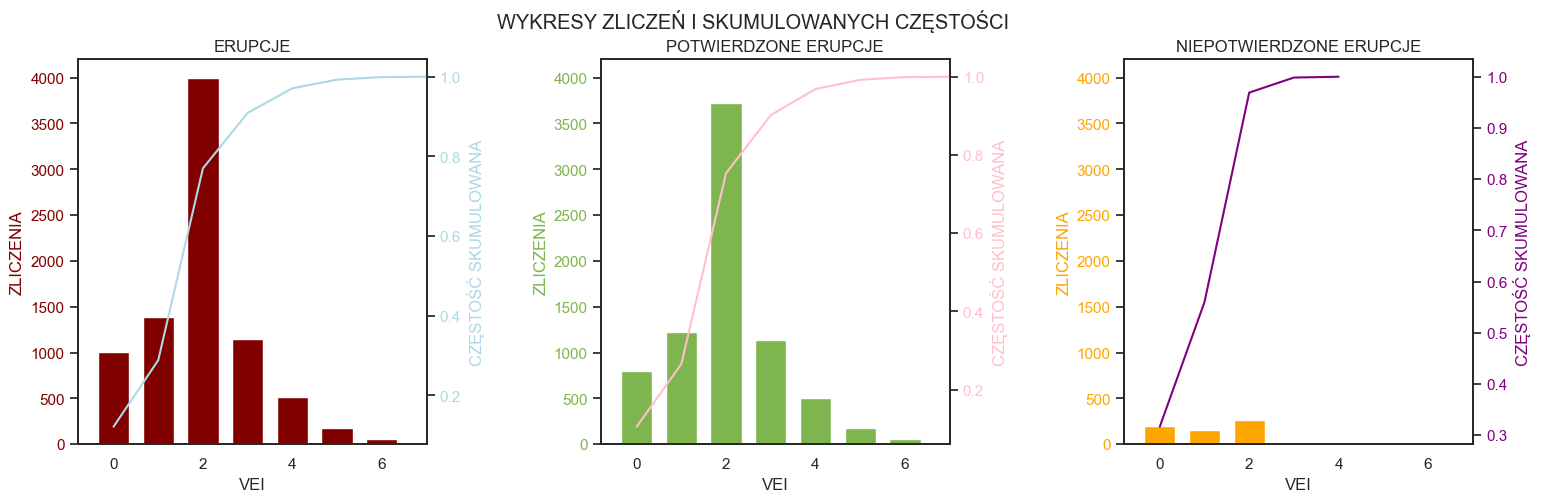

In [7]:
# YOUR CODE HERE

sns.set() 
sns.set_theme(style="white")
fig,axes=plt.subplots(1,3,figsize=(18,5))
fig.suptitle("WYKRESY ZLICZEŃ I SKUMULOWANYCH CZĘSTOŚCI")
#fig.tight_layout(pad=5.5) ##
plt.subplots_adjust(wspace=0.5)
axes[0].bar(vei_data.index,vei_data['All eruptions','f'], color ='maroon',width = 0.7)
axes[1].bar(vei_data.index,vei_data['Confirmed Eruptions','f'], color ='#7eb54e',width = 0.7)
axes[2].bar(vei_data.index,vei_data['Uncertain Eruptions','f'], color ='orange',width = 0.7)


axes[0].set_xlim(-0.8,7)
axes[1].set_xlim(-0.8,7)
axes[2].set_xlim(-0.8,7)

axes[0].set_ylim(0,4200)
axes[1].set_ylim(0,4200)
axes[2].set_ylim(0,4200)

axes[0].tick_params(labelcolor='maroon',axis='y')
axes[0].set_title("ERUPCJE")            
axes[0].set_xlabel("VEI")            
axes[0].set_ylabel("ZLICZENIA",color ='maroon') 

axes[1].tick_params(labelcolor='#7eb54e',axis='y')
axes[1].set_title("POTWIERDZONE ERUPCJE")            
axes[1].set_xlabel("VEI")            
axes[1].set_ylabel("ZLICZENIA",color='#7eb54e') 

axes[2].tick_params(labelcolor='orange',axis='y')
axes[2].set_title("NIEPOTWIERDZONE ERUPCJE")            
axes[2].set_xlabel("VEI")            
axes[2].set_ylabel("ZLICZENIA",color ='orange') 

axes0 = axes[0].twinx()
sns.lineplot(x=vei_data.index,y=vei_data['All eruptions','crf'],ax=axes0,color='lightblue')
axes0.tick_params(labelcolor='lightblue',axis='y')
axes0.set_ylabel("CZĘSTOŚĆ SKUMULOWANA",color ='lightblue') 

axes1 = axes[1].twinx()
sns.lineplot(x=vei_data.index,y=vei_data['Confirmed Eruptions','crf'],ax=axes1,color='pink')
axes1.tick_params(labelcolor='pink',axis='y')
axes1.set_ylabel("CZĘSTOŚĆ SKUMULOWANA",color ='pink') 

axes2 = axes[2].twinx()
sns.lineplot(x=vei_data.index,y=vei_data['Uncertain Eruptions','crf'],ax=axes2,color='purple')
axes2.tick_params(labelcolor='purple',axis='y')
axes2.set_ylabel("CZĘSTOŚĆ SKUMULOWANA",color ='purple')

### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

Indeks:
- Nagłówki 1 poziomu
    - kategoria dowodów
- Nagłówki 2 poziomu:
    - metoda, która dostarczyła dowodów

Kolumny: </br>
- VEI - wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [8]:
# YOUR CODE HERE

evidence_data = pd.crosstab([eruptions_data['Evidence Type'], eruptions_data['Evidence Method']], eruptions_data['VEI'])
evidence_data['All'] = eruptions_data.loc[:,['Evidence Type', 'Evidence Method']].groupby(['Evidence Type', 'Evidence Method']).value_counts()
cls = [x for x in range(0,8)]
cls.append('All')
evidence_data.columns = cls

#nie działa ale dlaczego????????????????????????????????????????????????????????????????????????????????????????
#dfi.export(evidence_data, 'evidence_data.png')
evidence_data.to_csv('evidence_data.csv')

evidence_data

# raise NotImplementedError()

0     1     2    3    4   5   6  7   All
Evidence Type Evidence Method                                                 
Correlation   Anthropology            4     1     5    2    6   1   0  0    19
              Magnetism              34     0     5    0    2   0   0  0    41
              Tephrochronology       71    16   122  124  103  22   5  0   463
Isotopic      14C (calibrated)       41    12    49  100  105  70  21  3   401
              14C (uncalibrated)    125     7    34   54   91  41  19  1   372
              Ar/Ar                  12     1     0    0    1   1   0  0    15
              Cosmic Ray Exposure    20     1     0    0    1   0   0  0    22
              K/Ar                   10     0     0    1    0   0   0  0    11
              Uranium-series         24     0     0    0    0   0   0  0    24
Observations  Aviation                0     1     0    0    0   0   0  0     1
              Hydrophonic            68     3     0    0    0   0   0  0    71
              Photo / Video           1     1     1    0    0   0   0  0     3
              Reported              376  1200  3430  837  194  42   7  1  6087
              Satellite (infrared)    1     0     1    1    0   0   0  0     3
              Satellite (visual)      0     2     3    1    0   0   0  0     6
              Seismicity             15     0     1    0    0   0   0  0    16
Radiogenic    Fission track           0     0     0    1    0   0   0  0     1
              Thermoluminescence      1     0     0    0    1   0   0  0     2
Sidereal      Dendrochronology        0     0     0    1    2   3   0  0     6
              Ice Core                0     0     3    0    3   0   1  2     9
              Varve Count             0     1    66    8    1   0   0  0    76
Uncertain     Unspecified           204   138   271   22    1   0   0  0   636

In [9]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

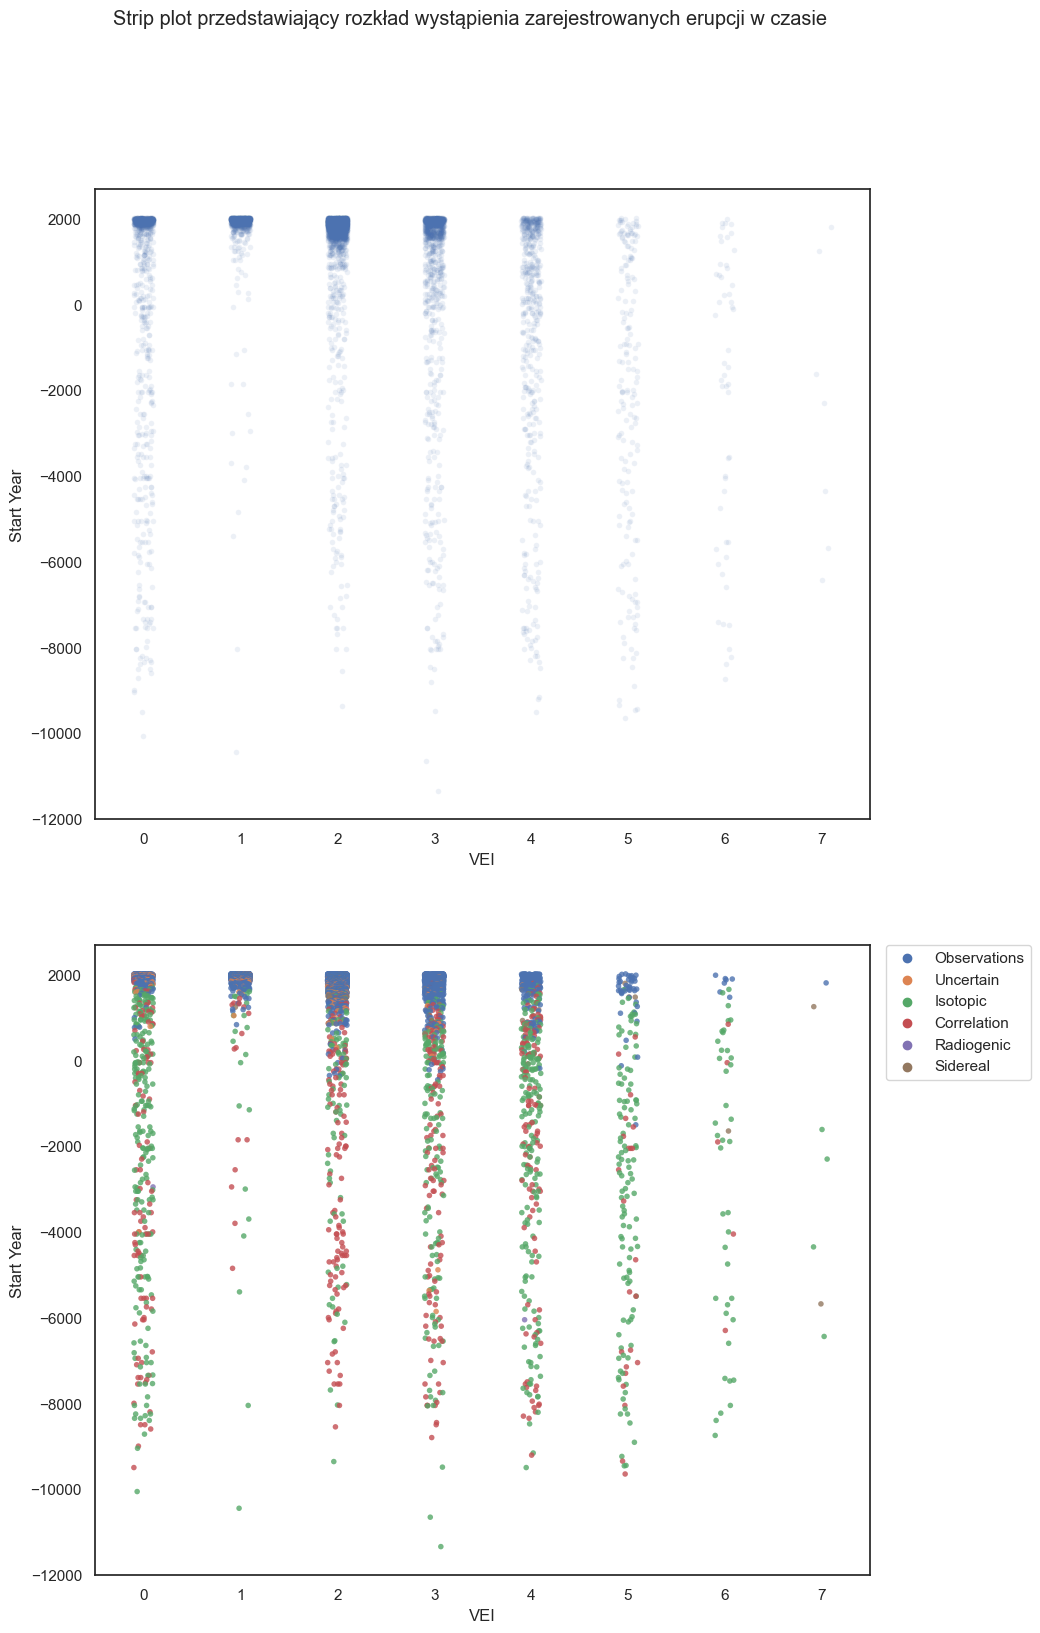

In [10]:
# YOUR CODE HERE
xold = eruptions_data['VEI'].sort_values().unique()
x = [int(x) for x in eruptions_data['VEI'].sort_values().unique()]

fig,axes=plt.subplots(2,1,figsize=(10,18))
fig.suptitle("Strip plot przedstawiający rozkład wystąpienia zarejestrowanych erupcji w czasie")
sns.stripplot(data=eruptions_data, x='VEI', y="Start Year", jitter = True, alpha = 0.1, s = 4, ax = axes[0])
axes[0].set_xticks(xold, x )
sns.stripplot(data=eruptions_data, x='VEI', y="Start Year", hue = 'Evidence Type', jitter = True, s = 4, alpha = 0.8, ax = axes[1])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(xold, x)

fig.savefig('strip_plots.png')
#raise NotImplementedError()